# To predict the values of single unit properties using the observations from 2017.

In [1]:
import env
import wrangle

In [2]:
zillow = wrangle.get_zillow()

this file exists, reading from csv


In [3]:
zillow = wrangle.prep_zillow(zillow)

In [4]:
wrangle.split_zillow(zillow)

(         Bedroom Count  Bathroom Count  Finished Square Feet  \
 793199             3.0             2.0                1433.0   
 1094025            4.0             1.0                2338.0   
 1272586            3.0             3.0                1980.0   
 96098              6.0             3.0                2232.0   
 990846             7.0             4.0                2578.0   
 ...                ...             ...                   ...   
 2009950            3.0             2.0                1661.0   
 1276046            1.0             2.0                1117.0   
 28810              4.0             3.0                2743.0   
 285907             3.0             2.0                1322.0   
 795717             2.0             2.0                1592.0   
 
          Structure Tax Value  Tax Value  Year Built  Tax Amount    FIPS  \
 793199              123152.0   239685.0      1977.0     3226.89  6037.0   
 1094025              36225.0    92119.0      1915.0     1807.37  

# Exploration

In [20]:
import pandas as pd
columns = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'yearbuilt',
       'taxamount', 'fips', 'propertylandusedesc']

for i in columns:
    nan_count = zillow[i].isnull().sum()
    nan_percentage = (nan_count / len(zillow)) * 100
    print(f"Column '{i}': {nan_count} NaN values,({nan_percentage:.4f}%)")

Column 'bedroomcnt': 13 NaN values,(0.0004%)
Column 'bathroomcnt': 25 NaN values,(0.0008%)
Column 'calculatedfinishedsquarefeet': 42165 NaN values,(1.4138%)
Column 'structuretaxvaluedollarcnt': 43532 NaN values,(1.4597%)
Column 'taxvaluedollarcnt': 31334 NaN values,(1.0507%)
Column 'yearbuilt': 44901 NaN values,(1.5056%)
Column 'taxamount': 19820 NaN values,(0.6646%)
Column 'fips': 0 NaN values,(0.0000%)
Column 'propertylandusedesc': 0 NaN values,(0.0000%)


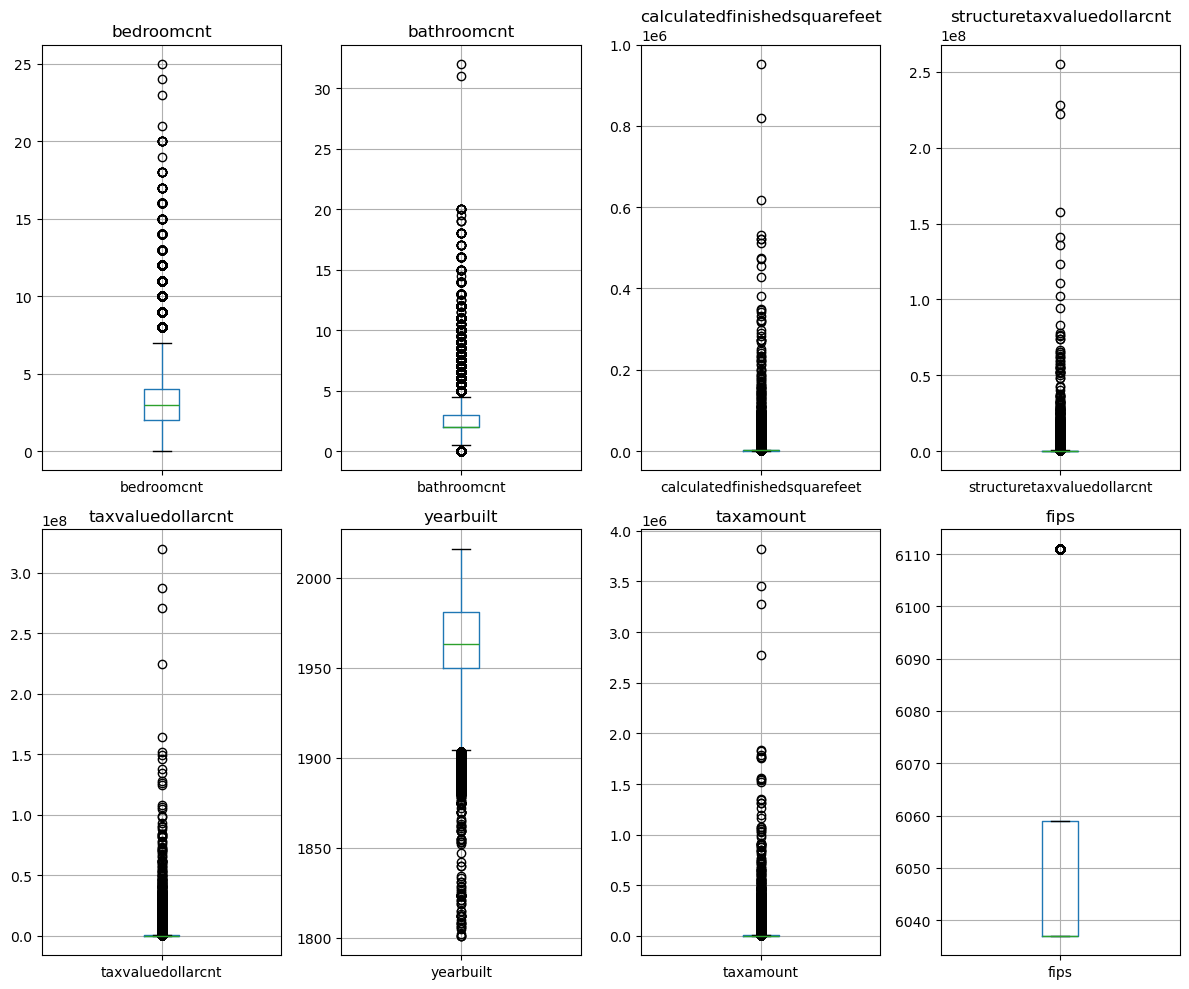

In [40]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'zillow'
columns_to_plot = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
                   'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'yearbuilt',
                   'taxamount', 'fips']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12, 10))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    zillow.boxplot(column=column, ax=axes[i])
    axes[i].set_title(column)

# Remove any unused subplots
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [41]:
zillow.calculatedfinishedsquarefeet.describe()

count    2.940120e+06
mean     1.831455e+03
std      1.954198e+03
min      1.000000e+00
25%      1.215000e+03
50%      1.574000e+03
75%      2.140000e+03
max      9.525760e+05
Name: calculatedfinishedsquarefeet, dtype: float64

In [42]:
zillow = zillow.dropna()

In [46]:
zillow.isna().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
fips                            0
propertylandusedesc             0
dtype: int64

In [60]:
print(zillow['FIPS'].value_counts())
print('6037: LA County')
print('6059: Orange County')
print('6111: Ventura County')


FIPS
6037.0    1969549
6059.0     717696
6111.0     212989
Name: count, dtype: int64
6037: LA County
6059: Orange County
6111: Ventura County
